# Similarity Methods

## Traditional

### Jaccard

The Jaccard metric can be calculated as the number of shared instances between two sets of data, over the total number of instances between both sets.

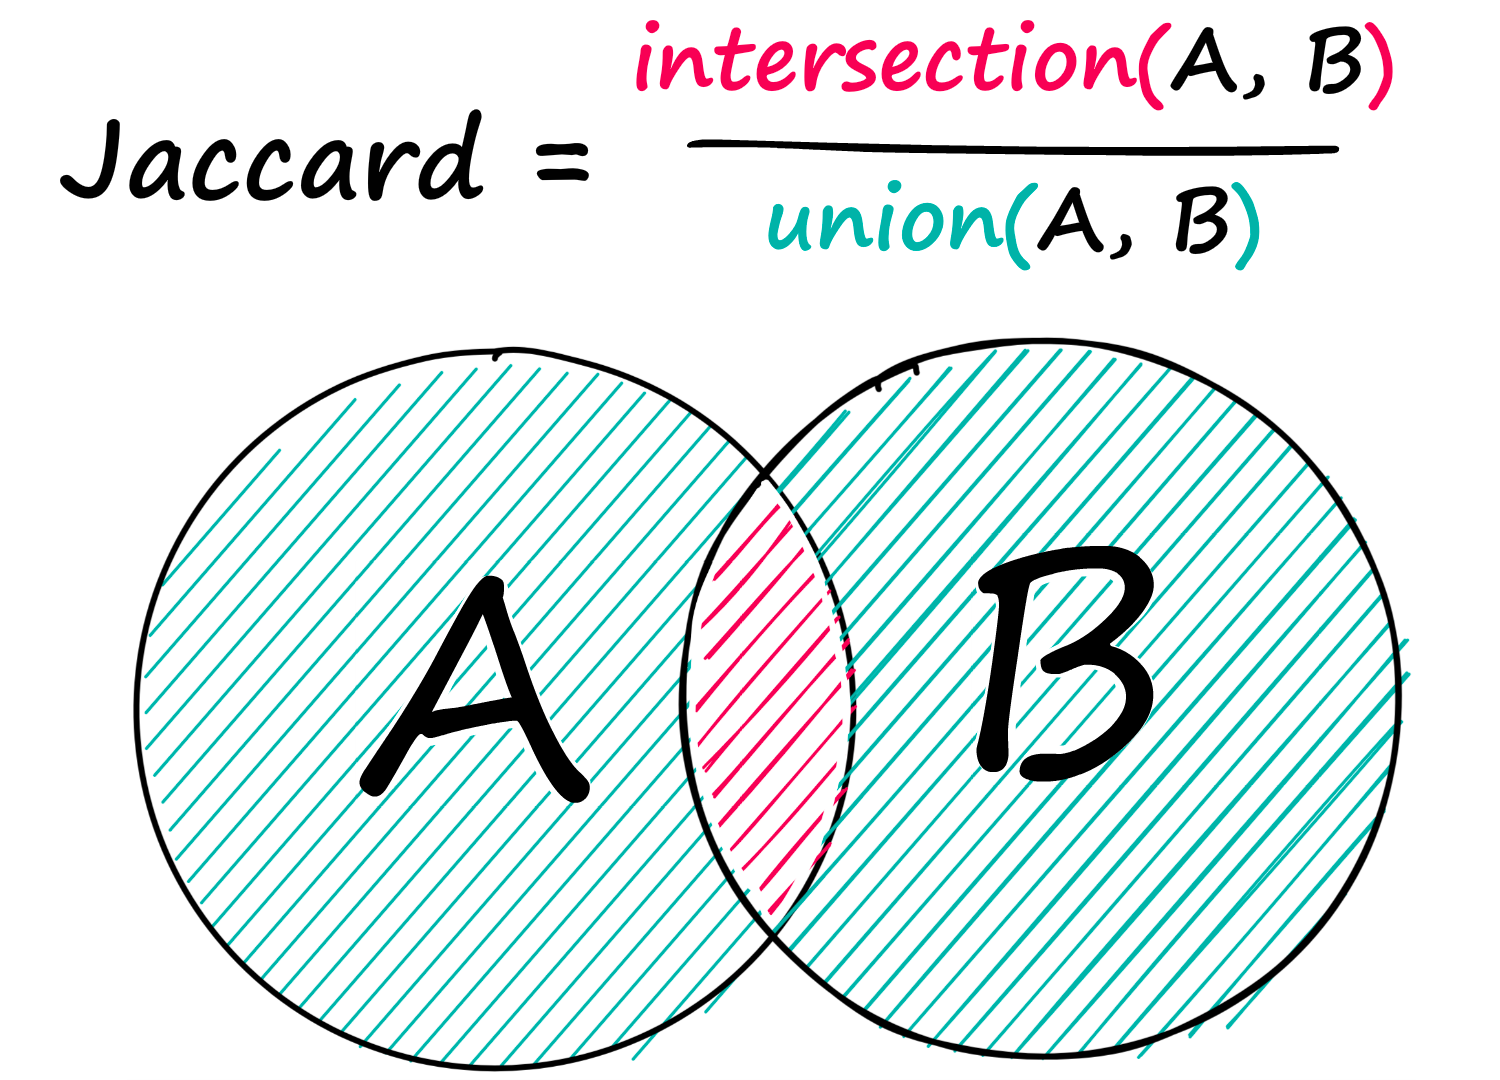

In [ ]:
a = "his thought process was on so many levels that he gave himself a phobia of heights"
b = "there is an art to getting your way and throwing bananas on to the street is not it"
c = "it is not often you find soggy bananas on the street"

We will first need to split our sentences into lists.

In [ ]:
a = a.split()
b = b.split()
c = c.split()
print(b)

['there', 'is', 'an', 'art', 'to', 'getting', 'your', 'way', 'and', 'throwing', 'bananas', 'on', 'to', 'the', 'street', 'is', 'not', 'it']


And convert our lists into sets (removing any duplication of words).

In [ ]:
a = set(a)
b = set(b)
c = set(c)
print(b)

{'to', 'way', 'bananas', 'and', 'getting', 'there', 'not', 'is', 'street', 'it', 'on', 'your', 'art', 'the', 'an', 'throwing'}


We then calculate the total number of shared words between sets.

In [ ]:
shared_a_b = a.intersection(b)
print(shared_a_b)
print(len(shared_a_b))

{'on'}
1


And then we calculate the total number of *unique* words between each set.

In [ ]:
count_a_b = len(a.union(b))
print(count_a_b)

31


To calculate the Jaccard similarity between both, we take the number of shared words / total words.

In [ ]:
len(shared_a_b) / count_a_b

0.03225806451612903

And there is our Jaccard similarity - we can rewrite this into a function.

In [ ]:
def jac(x: set, y: set):
    shared = x.intersection(y)  # selects shared tokens only
    return len(shared) / len(x.union(y))  # union adds both sets together

In [ ]:
jac(a, b)

0.03225806451612903

In [ ]:
jac(b, c)

0.35

And we find that sentences `b` and `c` score much better, as we would expect. Now, it isn't perfect, two sentences that share nothing but words like *'the'*, *'a'*, *'how'*, etc - could return high Jaccard scores despite being completely dissimilar. We can go part way to solving some of these shortcomings through the use of stopword removal, stemming or lemmatization (so words like *'travelling'* and *'travels'* can match), and other preprocessing techniques. However, there are other methods that avoid these problems altogether.

---

## w-Shingling

w-shingling is a very similar method to Jaccard similarity. It uses the exact same `intersection / union` logic, but with *'shingles'*. Let's put together an example using bigrams - eg 2-shingling.

In [ ]:
a = "his thought process was on so many levels that he gave himself a phobia of heights".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()

In [ ]:
a_shingle = set([' '.join([a[i], a[i+1]]) for i in range(len(a)) if i != len(a)-1])
b_shingle = set([' '.join([b[i], b[i+1]]) for i in range(len(b)) if i != len(b)-1])
c_shingle = set([' '.join([c[i], c[i+1]]) for i in range(len(c)) if i != len(c)-1])
print(a_shingle)

{'thought process', 'a phobia', 'levels that', 'so many', 'that he', 'was on', 'gave himself', 'process was', 'he gave', 'of heights', 'phobia of', 'many levels', 'his thought', 'himself a', 'on so'}


In [ ]:
jac(a_shingle, b_shingle)

0.0

In [ ]:
jac(b_shingle, c_shingle)

0.125

In [ ]:
b_shingle.intersection(c_shingle)  # these are the matching shingles

{'bananas on', 'is not', 'the street'}